In [1]:
# Read the data, import pandas and numpy
import pandas as pd
import numpy as np
df_uvb = pd.read_csv('temperature-UVB.csv')

In [2]:
# Save the data into variables
X = df_uvb['Temperature'].to_numpy()
# Each value in it's own array
X = X.reshape(-1, 1)
y = df_uvb['UVB'].to_numpy()

In [3]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# default test set size = 0.25 * data
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Read data into dataframes
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

In [14]:
# Create the polynomial model and features
from sklearn.preprocessing import PolynomialFeatures
degree = 2
polynomial_model = PolynomialFeatures(degree=degree)
X_train_poly, X_test_poly = polynomial_model.fit_transform(X_train_df) , polynomial_model.fit_transform(X_test_df)

In [15]:
# Use polynomial model with linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting the model
model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_
print("Polynomial coefficients: ", model.coef_)

Polynomial coefficients:  [0.         0.05938569 0.00397691]


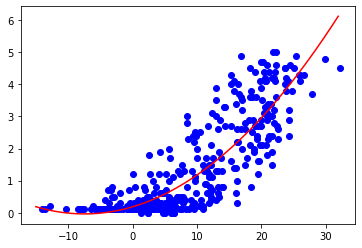

In [16]:
# Plot the regression
import matplotlib.pyplot as plt

x_axis = np.arange(-15, 32, 0.1)
def response():
    sum = intercept
    i = 1
    while i <= degree:
        sum += coefficient[i] * x_axis**i
        i += 1
    return sum

plt.scatter(X, y, color="b")
plt.plot(x_axis, response(), color="r")
plt.show()


In [17]:
# Print the error
from sklearn.metrics import mean_squared_error, r2_score
pred_values = model.predict(X_test_poly)
msq = mean_squared_error(y_test, pred_values)
print("Average mean squared error in test set", msq)
print("R2-score in test set: ", r2_score(y_test, pred_values))

Average mean squared error in test set 0.6560780080984543
R2-score in test set:  0.7215251723318024


In [18]:
# Print the error in the training data
pred_values = model.predict(X_train_poly)
msq = mean_squared_error(pred_values, y_train)
print("Average mean squared error in training set", msq)
print("R2-score in training set: ", r2_score(y_train, pred_values))

Average mean squared error in training set 0.573907198845665
R2-score in training set:  0.7405373789604435
